# Retrieval


In [1]:
from retrieval import ImageRetrieval

## 1) For a given embedding from Dataset 1, retrieve the top 5 most similar embeddings within Dataset 1 itself, and evaluate the retrieval metrics.

### 1.1) Load the dataset and initialize the retrieval system

In [2]:
ret = ImageRetrieval("/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v2/4-improvement1_supremo.csv",
                     "/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v2/improvement1_model4_keypoints.npy",
                     "/Users/lorenzodimaio/Download/SIDS_revelation_project/Retrieval/dataset_1.coco/train")
ret.df.head()

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,label,image_path
0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278,2,2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b...
1,1.0,1.0,1.0,1.0,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.275490,0.685025,0.060125,0.090708,122.830704,147.334488,0.085138,1.648186,2,80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg
2,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.728926,2,3683_png_jpg.rf.f1e0f73267c0f4c6a96ba03c90b147...
3,1.0,1.0,1.0,1.0,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,...,0.158529,0.397289,0.040059,0.172300,87.692261,154.811371,0.004185,0.582652,1,Nanit_21_JPG_jpg.rf.66d4221bcfa5fbe245a4cb9c9f...
4,1.0,1.0,1.0,1.0,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,...,0.131284,0.496643,0.039298,0.121073,104.018150,136.106201,0.002724,1.227875,1,50_jpg.rf.93d6c51bfd14a04c261f1bfff343ad43.jpg


### 1.2) Build the nearest neighbor index

In [3]:
ret.build_index()

### 1.3) Find the 10 closest images to the query image at index 0 without printing intermediate details.

In [4]:
distances, image_paths_similar = ret.retrieve_similar(idx_query=0, k=10, verbose=False)

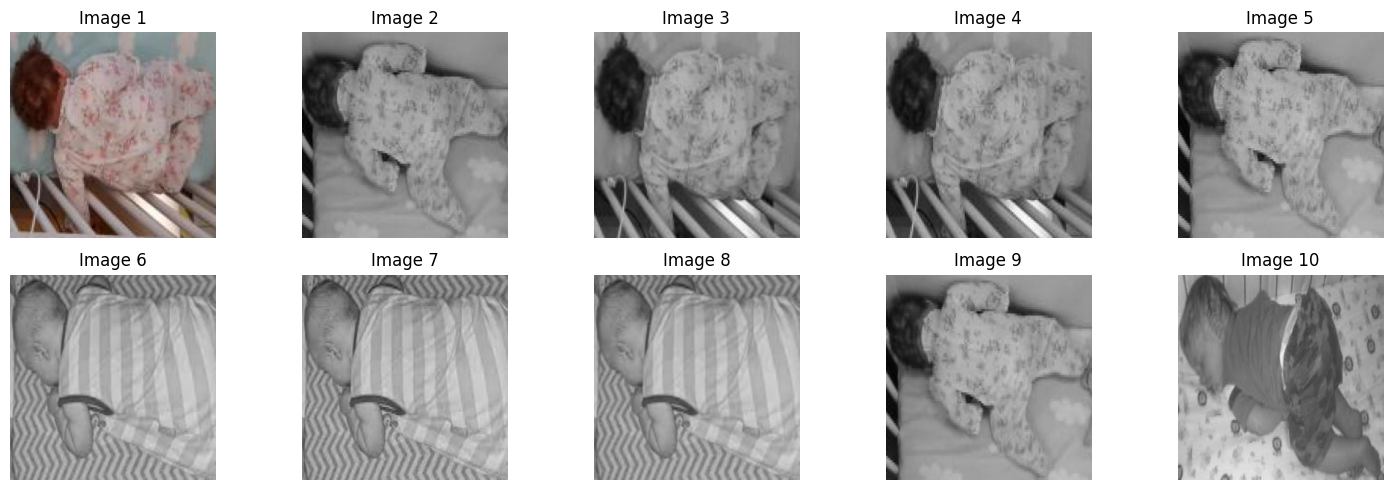

In [5]:
ret.show_images(image_paths_similar)

### 1.4) Evaluate retrieval performance with precision@10 and recall@10

In [6]:
ret.precision_at_k(k=10)
ret.recall_at_k(k=10)

Average retrieval accuracy at 10: 0.751
Recall at 10: 0.010


## 2) Take an embedding from Dataset 1, retrieve the top 5 most similar embeddings from Dataset 2, and evaluate the retrieval metrics.

Dataset 1 -> https://universe.roboflow.com/skt/baby_posture  <br>
Dataset 2 -> https://universe.roboflow.com/reconhecimento-facial/bebe-detect/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true (We have to modify the class names)

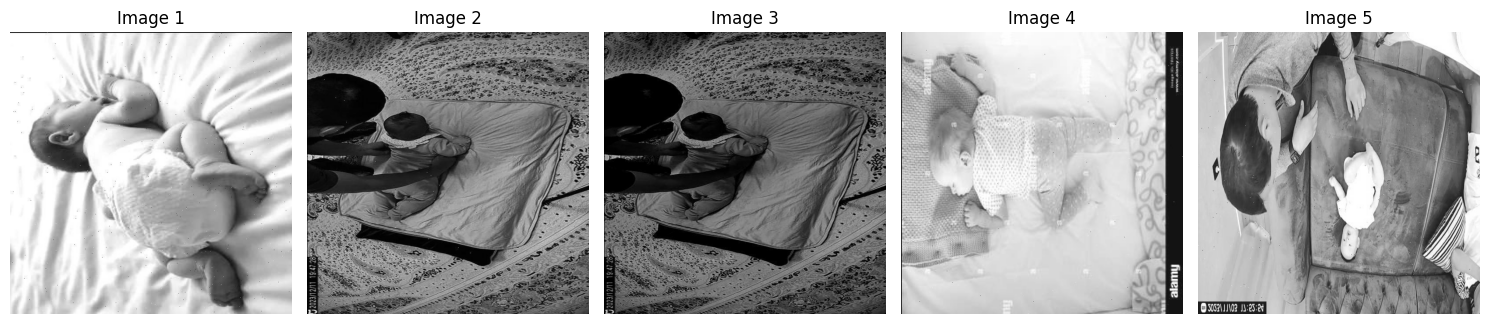

In [7]:
import numpy as np
# Dataset 1
ret1 = ImageRetrieval("/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v2/4-improvement1_supremo.csv",
                     "/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v2/improvement1_model4_keypoints.npy",
                     "/Users/lorenzodimaio/Download/SIDS_revelation_project/Retrieval/dataset_1.coco/train")
# Dataset 2
ret2 = ImageRetrieval(
    "/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/dataset_2/4-improvement1_supremo.csv",
    "/Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/dataset_2/improvement1_model4_keypoints.npy",
    "/Users/lorenzodimaio/Download/SIDS_revelation_project/Retrieval/dataset_2.coco/train"
)

ret2.build_index(metric="euclidean", k=5)

# Choose a query index form dataset_1
idx_query = 0  # for example, the first image
query_embedding_1 = ret1.embeddings_norm[idx_query].reshape(1, -1)

distances_2, image_paths_similar_2 = ret2.retrieve_similar(idx_query=0,k=5,verbose=False,external_embeddings=True,external_embd=query_embedding_1)

ret2.show_images(image_paths_similar_2)

In [8]:
external_embeddings = ret1.df.loc[:, 'embedding_0':'embedding_27'].to_numpy()
external_labels = ret1.df['label'].to_numpy()

ret2.precision_at_k(k=5)
ret2.recall_at_k(k=5)

Average retrieval accuracy at 5: 0.625
Recall at 5: 0.004
